# Modelling Optimal Strategies for a Single Car

This notebook summarises some examples of using the Python functions defined in *Modelling_Utilities.py* to optimise race strategy. Here, we are optimising the strategy for a car running on its own.

In [4]:
import Modelling_Utilities as mu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Plotting the laptimes from a F1 Grand Prix

In [9]:
year = 2019
round_num = 2
driver_name = 'Sergio Pérez'

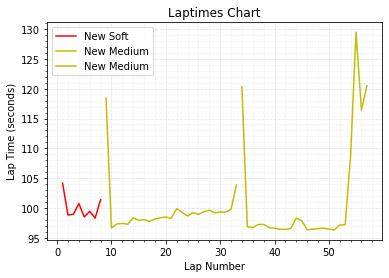

In [10]:
results_df = mu.download_laptimes(year, round_num, driver_name)
mu.plot_laptimes(results_df)

## Finding & plotting optimal strategies with known tyre deg variables

The code below plots the optimal strategy based off a quadratic tyre deg function. In this case, there's more than one strategy that can minimise the total race time, so both are plotted.

For more details on the quadratic tyre deg function, please refer to the README document in the *modelling* folder.

In [13]:
laps_completed_already = 3
total_race_laps = 52
pitstop_time = 24 # Total time in seconds to make a pitstop
current_tyre_description = 'Soft' # Either 'Soft', 'Medium' or 'Hard'
current_tyre_age = 3 # Total laps the tyre has already done
need_to_use_different_tyre = 'Yes' # Either 'Yes' or 'No', depending on whether you still need to use a different compound of tyre before the end of the race
max_pitstops = 2 # Here you can choose a maximum number of pitstops - the find_optimium_strategy function has a absolute maximum of 3 that it can handle.

# The following parameters will define the shape of the quadratic tyre deg curve
k = 0.3
d = 0.6

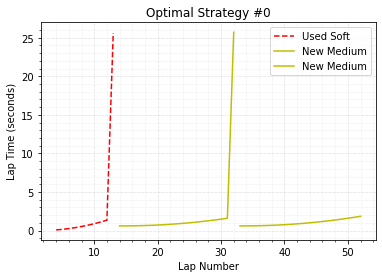

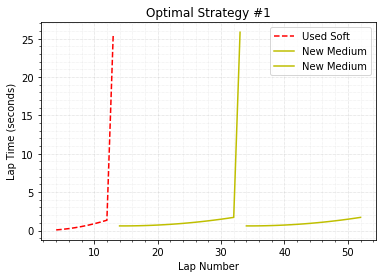

In [14]:
optimal_strategy = mu.find_optimum_strategy(laps_completed_already, total_race_laps, pitstop_time, current_tyre_description,
                                            current_tyre_age, need_to_use_different_tyre, max_pitstops,
                                            mu.tyre_deg_curve_quadratic, soft_tyre_deg_quadratic = 0.012, soft_tyre_deg_linear = -0.01,
                                            medium_tyre_pace_deficit = d, medium_tyre_deg_quadratic = 0.012*k, medium_tyre_deg_linear = -0.01*k,
                                            hard_tyre_pace_deficit = 2*d, hard_tyre_deg_quadratic = 0.012*(k**2), hard_tyre_deg_linear = -0.01*(k**2)
                                           )
for i in range(0,len(optimal_strategy.index)):
    results_df = pd.DataFrame({'lap_number': optimal_strategy.iloc[i]['lap_number_list'],
                              'tyre_stint_number': optimal_strategy.iloc[i]['tyre_stint_number_list'],
                              'tyre_description': optimal_strategy.iloc[i]['tyre_description_list'],
                              'tyre_status': optimal_strategy.iloc[i]['tyre_status_list'],
                              'lap_time': optimal_strategy.iloc[i]['lap_times_adjusted']})
    mu.plot_laptimes(results_df, 'Optimal Strategy #{0}'.format(i))

Note that the lap times plotted have been adjusted to be centered on the baseline race laptime of a Soft tyre on its first lap. To get the 'real' lap times, you would need to find and add this constant to every lap.

## Finding optimal strategies across multiple tyre deg variables

The following code plots a heatmap of optimal strategies via a grid search across multiple tyre deg parameters. The idea here is to identify how close we are to the boundary of a different race strategy being optimal.

Again, we will assume quadratic tyre deg. For more details on the quadratic tyre deg function, please refer to the README document in the *modelling* folder.

In [17]:
laps_completed_already = 3
total_race_laps = 52
pitstop_time = 24 # Total time in seconds to make a pitstop
current_tyre_description = 'Soft' # Either 'Soft', 'Medium' or 'Hard'
current_tyre_age = 3 # Total laps the tyre has already done
need_to_use_different_tyre = 'Yes' # Either 'Yes' or 'No', depending on whether you still need to use a different compound of tyre before the end of the race
max_pitstops = 2 # Here you can choose a maximum number of pitstops - the find_optimium_strategy function has a absolute maximum of 3 that it can handle.

# The following parameters will define the shape of the quadratic tyre deg curve
param1_range = np.arange(0.1, 0.2, 0.01) # Parameter 1 will be called 'k' later, and is the multiplicative factor by which each harder step of tyre compound has less degradation.
param2_range = np.arange(0.8, 1.3, 0.1) # Parameter 2 will be called 'd' later, and is the difference in seconds per lap between each step of tyre compound, without any degradation factor.

Finished optimising for k = 0.10 and d = 0.8
Finished optimising for k = 0.11 and d = 0.8
Finished optimising for k = 0.12 and d = 0.8
Finished optimising for k = 0.13 and d = 0.8
Finished optimising for k = 0.14 and d = 0.8
Finished optimising for k = 0.15 and d = 0.8
Finished optimising for k = 0.16 and d = 0.8
Finished optimising for k = 0.17 and d = 0.8
Finished optimising for k = 0.18 and d = 0.8
Finished optimising for k = 0.19 and d = 0.8
Finished optimising for k = 0.10 and d = 0.9
Finished optimising for k = 0.11 and d = 0.9
Finished optimising for k = 0.12 and d = 0.9
Finished optimising for k = 0.13 and d = 0.9
Finished optimising for k = 0.14 and d = 0.9
Finished optimising for k = 0.15 and d = 0.9
Finished optimising for k = 0.16 and d = 0.9
Finished optimising for k = 0.17 and d = 0.9
Finished optimising for k = 0.18 and d = 0.9
Finished optimising for k = 0.19 and d = 0.9
Finished optimising for k = 0.10 and d = 1.0
Finished optimising for k = 0.11 and d = 1.0
Finished o

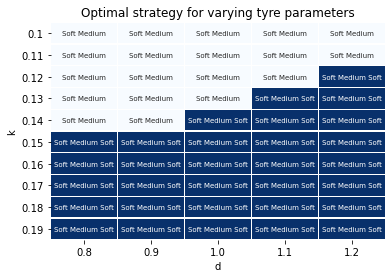

In [18]:
# Cross join to get all the possible combinations of parameters
parameter_grid = np.transpose([np.tile(param1_range, len(param2_range)), np.repeat(param2_range, len(param1_range))])
optimal_number_pitstops = []
optimal_tyre_choice = []
# Get the optimal strategy for these different parameter ranges
for i in range(0,len(parameter_grid)):
    row = parameter_grid[i]
    k = row[0]
    d = row[1]
    results_df = mu.find_optimum_strategy(laps_completed_already, total_race_laps, pitstop_time, current_tyre_description,
                                          current_tyre_age, need_to_use_different_tyre, max_pitstops,
                                          mu.tyre_deg_curve_quadratic, soft_tyre_deg_quadratic = 0.012, soft_tyre_deg_linear = -0.01,
                                          medium_tyre_pace_deficit = d, medium_tyre_deg_quadratic = 0.012*k, medium_tyre_deg_linear = -0.01*k,
                                          hard_tyre_pace_deficit = 2*d, hard_tyre_deg_quadratic = 0.012*(k**2), hard_tyre_deg_linear = -0.01*(k**2))
    if results_df["pitstop_1_lap"][0] == -1:
        optimal_number_pitstops.append(0)
        optimal_tyre_choice.append(str(results_df["pitstop_0_tyre"][0]))
    elif results_df["pitstop_2_lap"][0] == -1:
        optimal_number_pitstops.append(1)
        optimal_tyre_choice.append(str(results_df["pitstop_0_tyre"][0]) + " " + str(results_df["pitstop_1_tyre"][0]))
    else:
        optimal_number_pitstops.append(2)
        alphabetical_tyres = [str(results_df["pitstop_1_tyre"][0]),str(results_df["pitstop_2_tyre"][0])]
        alphabetical_tyres.sort()
        optimal_tyre_choice.append(str(results_df["pitstop_0_tyre"][0]) + " " + alphabetical_tyres[0] + " " + alphabetical_tyres[1])
    print("Finished optimising for k = {:.2f} and d = {:.1f}".format(k,d))
parameter_df = pd.DataFrame(parameter_grid, columns = ['k','d'])
parameter_df = parameter_df.round({'k': 2, 'd': 1})
parameter_df["optimal_number_pitstops"] = optimal_number_pitstops
parameter_df["optimal_tyre_choice"] = optimal_tyre_choice
pivot_tab = parameter_df.pivot_table('optimal_number_pitstops', index = 'k', columns = 'd')
annotations = parameter_df.pivot_table('optimal_tyre_choice', index = 'k', columns = 'd', aggfunc = lambda x: ' '.join(x))
sns.heatmap(pivot_tab, annot = annotations, annot_kws={"size": 7}, fmt = '', cmap = 'Blues', cbar = False, linewidths=.3)
plt.xlabel("d")
plt.ylabel("k")
plt.title("Optimal strategy for varying tyre parameters")
plt.show()